<a href="https://colab.research.google.com/github/zinakhazaee/MachineLearning-SupervisedLearning_Regression/blob/main/usa_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets_sample/usa-real-estate-datase/realtor-data.zip.csv')

In [3]:
df.shape

(1004966, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004966 entries, 0 to 1004965
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1004966 non-null  object 
 1   bed             864435 non-null   float64
 2   bath            882116 non-null   float64
 3   acre_lot        709920 non-null   float64
 4   city            1004891 non-null  object 
 5   state           1004966 non-null  object 
 6   zip_code        1004761 non-null  float64
 7   house_size      681682 non-null   float64
 8   prev_sold_date  505867 non-null   object 
 9   price           1004895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 76.7+ MB


In [ ]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [ ]:
df.isna().sum()

status                 0
bed               140531
bath              122850
acre_lot          295046
city                  75
state                  0
zip_code             205
house_size        323284
prev_sold_date    499099
price                 71
dtype: int64

In [ ]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [ ]:
print('status:','\n', df.status.value_counts(),
      '\n','bed values:','\n', df.bed.value_counts(),
      '\n','bath values:','\n', df.bath.value_counts(),
      '\n','state values:', '\n' ,df.state.value_counts(),
      '\n','city values:', '\n' ,df.city.value_counts())

status: 
 for_sale          1003152
ready_to_build       1814
Name: status, dtype: int64 
 bed values: 
 3.0      267108
2.0      186896
4.0      166232
1.0       95250
5.0       67503
6.0       41023
7.0       14103
8.0       11302
9.0        5910
10.0       2999
12.0       2031
11.0       1493
13.0        378
15.0        335
14.0        330
20.0        261
18.0        244
16.0        188
24.0        165
19.0        125
22.0        110
17.0         96
28.0         54
21.0         40
46.0         36
42.0         30
60.0         27
99.0         23
32.0         21
86.0         21
31.0         20
27.0         13
123.0        12
33.0         11
49.0          8
30.0          8
29.0          7
68.0          6
25.0          4
23.0          3
40.0          3
36.0          3
47.0          3
Name: bed, dtype: int64 
 bath values: 
 2.0      303305
1.0      221660
3.0      209379
4.0       80134
5.0       31834
6.0       15930
7.0        7451
8.0        4889
9.0        2785
10.0       1740
12.0  

In [ ]:
df['house_size'].value_counts()

1200.0     5230
800.0      4852
1000.0     4668
1100.0     4354
750.0      4170
           ... 
11033.0       1
5775.0        1
9821.0        1
10440.0       1
5046.0        1
Name: house_size, Length: 6456, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,864435.0,3.338434,2.082706e+00,1.0,2.00,3.00,4.00,123.0
bath,882116.0,2.513053,1.970696e+00,1.0,1.00,2.00,3.00,198.0
acre_lot,709920.0,15.989320,9.231736e+02,0.0,0.11,0.29,1.16,100000.0
zip_code,1004761.0,6852.214974,3.798489e+03,601.0,3261.00,7052.00,10021.00,99999.0
house_size,681682.0,2167.793055,3.031550e+03,100.0,1127.00,1662.00,2512.00,1450112.0
price,1004895.0,886657.387120,2.731044e+06,0.0,269900.00,479988.00,845000.00,875000000.0


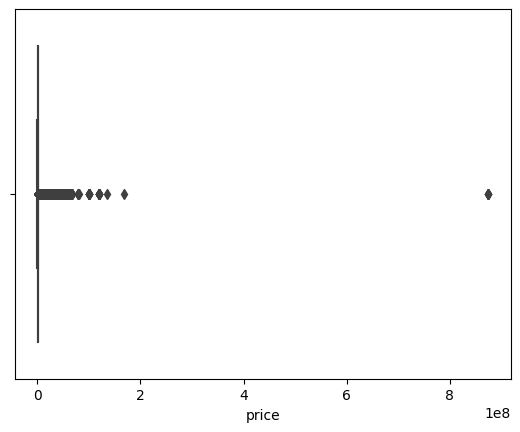

In [ ]:
sns.boxplot(data = df , x='price')

In [21]:
df.drop(df[df['price'] >= 200000000 ].index , axis=0 , inplace= True)

<Axes: xlabel='price', ylabel='Count'>

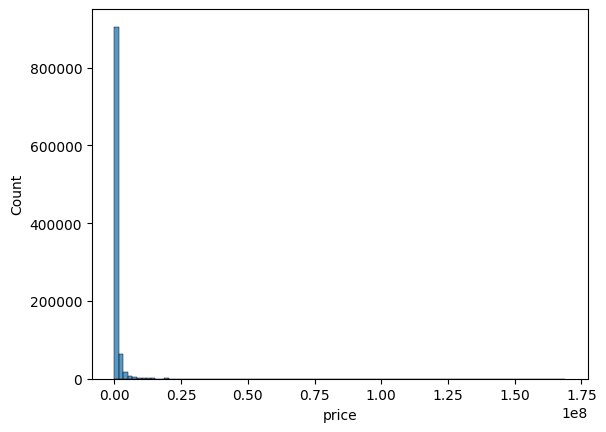

In [ ]:
sns.histplot(df['price'] , bins= 100 )

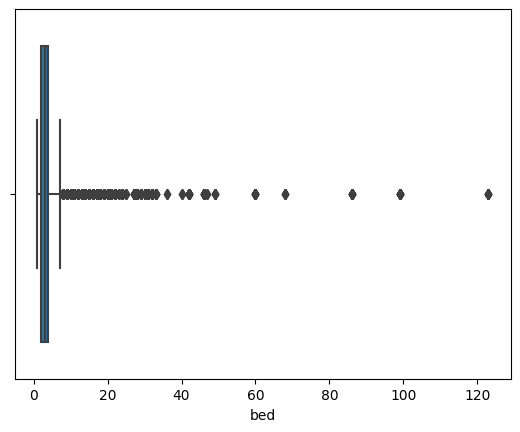

In [ ]:
sns.boxplot(data = df , x='bed')


In [22]:
bed_reduced = df[df['bed']< 20]

In [7]:
bed_reduced.shape

(863541, 10)

In [8]:
bed_reduced.isna().sum()

status                 0
bed                    0
bath                5425
acre_lot          272795
city                  24
state                  0
zip_code              99
house_size        202814
prev_sold_date    388710
price                 71
dtype: int64

<Axes: xlabel='price'>

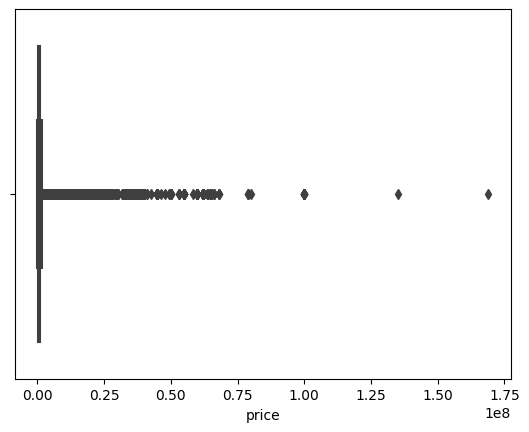

In [ ]:
sns.boxplot(data = bed_reduced , x='price')

<Axes: xlabel='house_size'>

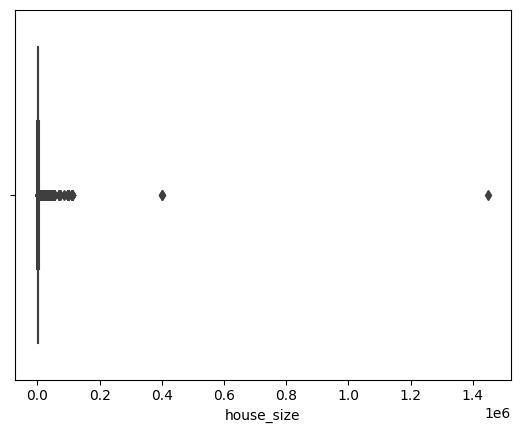

In [ ]:
sns.boxplot(data = bed_reduced , x='house_size')

In [23]:
bed_reduced.drop(bed_reduced[(bed_reduced['house_size']> 40000) & (bed_reduced['bed']<10)].index , axis= 0 , inplace=True)

<ipython-input-23-9d448ab4c34c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_reduced.drop(bed_reduced[(bed_reduced['house_size']> 40000) & (bed_reduced['bed']<10)].index , axis= 0 , inplace=True)


In [24]:
bed_reduced.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,863375.000000,857950.000000,590608.000000,863276.000000,660561.000000,8.633040e+05
mean,3.309672,2.516734,10.200451,7015.875599,2136.215815,9.494294e+05
std,1.762322,1.480919,691.293358,3790.109489,1937.404459,1.951759e+06
min,1.000000,1.000000,0.000000,601.000000,100.000000,0.000000e+00
25%,2.000000,2.000000,0.110000,3446.000000,1146.000000,3.150000e+05
50%,3.000000,2.000000,0.230000,7106.000000,1670.000000,5.250000e+05
75%,4.000000,3.000000,0.730000,10023.000000,2508.000000,8.900000e+05
max,19.000000,24.000000,100000.000000,95652.000000,39996.000000,1.690000e+08


In [26]:
bed_reduced.duplicated(subset=['zip_code']).sum()

860273

In [28]:
bed_reduced.drop_duplicates(subset=['zip_code'], keep= 'first', inplace=True)

<ipython-input-28-1c8b3c41c085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_reduced.drop_duplicates(subset=['zip_code'], keep= 'first', inplace=True)


<Axes: xlabel='price'>

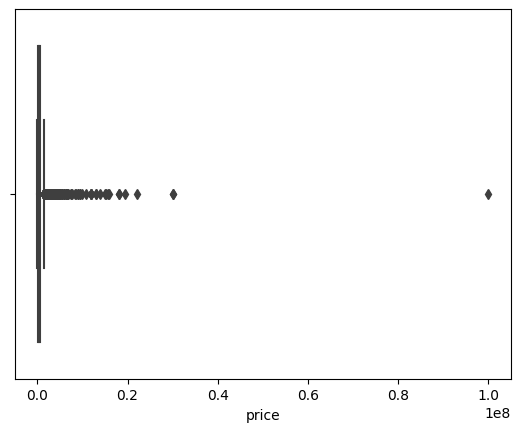

In [29]:
sns.boxplot(data = bed_reduced , x='price')

In [30]:
bed_reduced.drop(bed_reduced[bed_reduced['price'] >= 75000000].index , axis=0 , inplace= True)

<ipython-input-30-4bd91b2ee194>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_reduced.drop(bed_reduced[bed_reduced['price'] >= 75000000].index , axis=0 , inplace= True)


<Axes: xlabel='house_size'>

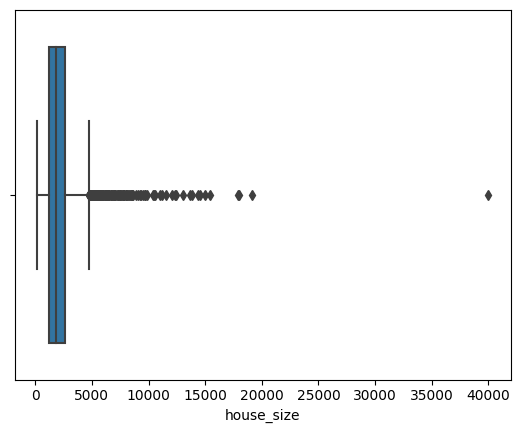

In [31]:
sns.boxplot(data = bed_reduced , x='house_size')

<Axes: xlabel='bed'>

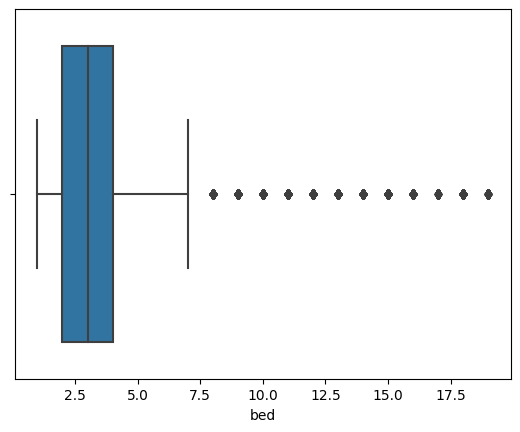

In [13]:
sns.boxplot(data = bed_reduced , x='bed')

In [32]:
bed_reduced.dropna(subset=['price'], inplace=True)

<ipython-input-32-3317ba81ba68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_reduced.dropna(subset=['price'], inplace=True)


In [33]:
bed_reduced.drop(columns= ['status','acre_lot', 'zip_code','prev_sold_date'] , inplace=True)

<ipython-input-33-885de7e17e84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_reduced.drop(columns= ['status','acre_lot', 'zip_code','prev_sold_date'] , inplace=True)


In [34]:
bed_reduced.isna().sum()

bed             0
bath           48
city            1
state           0
house_size    387
price           0
dtype: int64

In [35]:
bed_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 985903
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bed         3101 non-null   float64
 1   bath        3053 non-null   float64
 2   city        3100 non-null   object 
 3   state       3101 non-null   object 
 4   house_size  2714 non-null   float64
 5   price       3101 non-null   float64
dtypes: float64(4), object(2)
memory usage: 169.6+ KB


<Axes: xlabel='bed'>

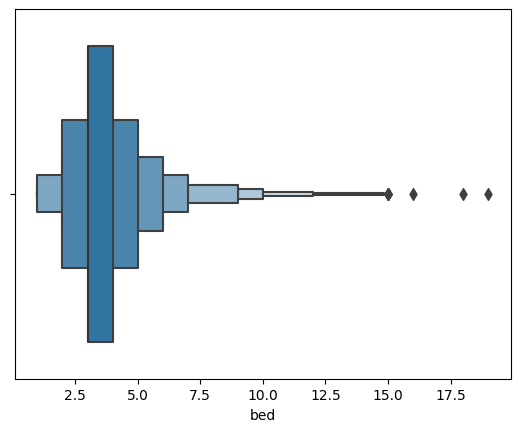

In [36]:
sns.boxenplot(data = bed_reduced , x= 'bed')

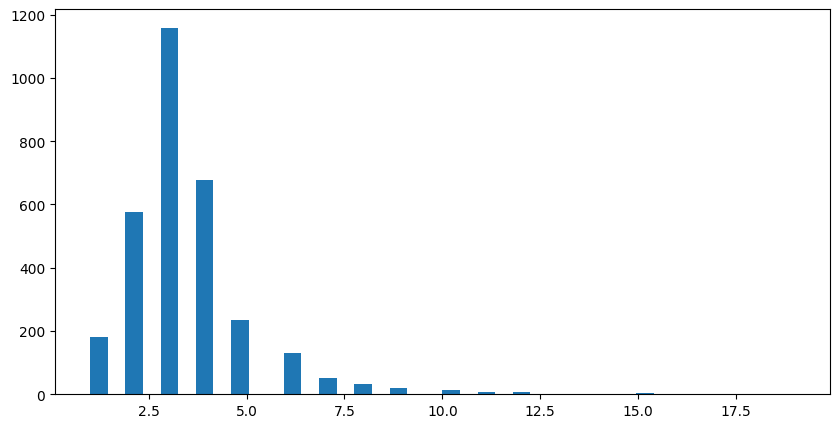

In [37]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= bed_reduced['bed'], bins=40)
plt.show()

In [38]:
bed_reduced['bed'].value_counts()

3.0     1159
4.0      677
2.0      577
5.0      234
1.0      182
6.0      130
7.0       53
8.0       34
9.0       21
10.0      12
11.0       8
12.0       7
15.0       4
18.0       1
19.0       1
16.0       1
Name: bed, dtype: int64

In [42]:
bed_reduced.drop(bed_reduced[bed_reduced['house_size']>=20000].index ,axis= 0 , inplace=True)

<ipython-input-42-ca1a94820f9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_reduced.drop(bed_reduced[bed_reduced['house_size']>=20000].index ,axis= 0 , inplace=True)


<Axes: xlabel='house_size'>

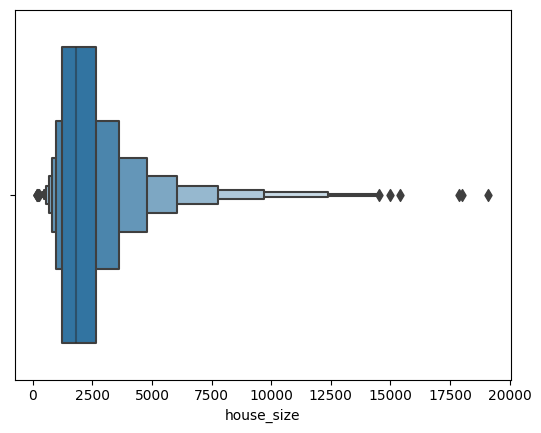

In [43]:
sns.boxenplot(data = bed_reduced , x= 'house_size')

In [44]:
bed_reduced['house_size'].max()

19110.0

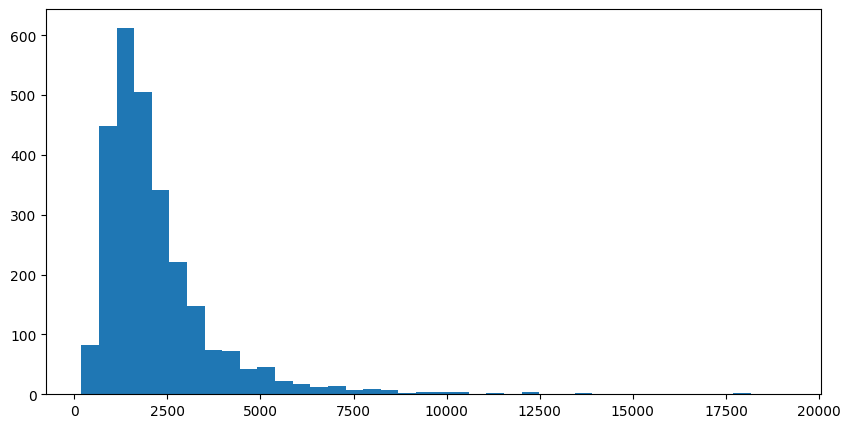

In [46]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= bed_reduced['house_size'], bins=40)
plt.show()

In [47]:
house_reduced = bed_reduced[bed_reduced['house_size'] < 15000]

In [48]:
house_reduced.shape

(2708, 6)

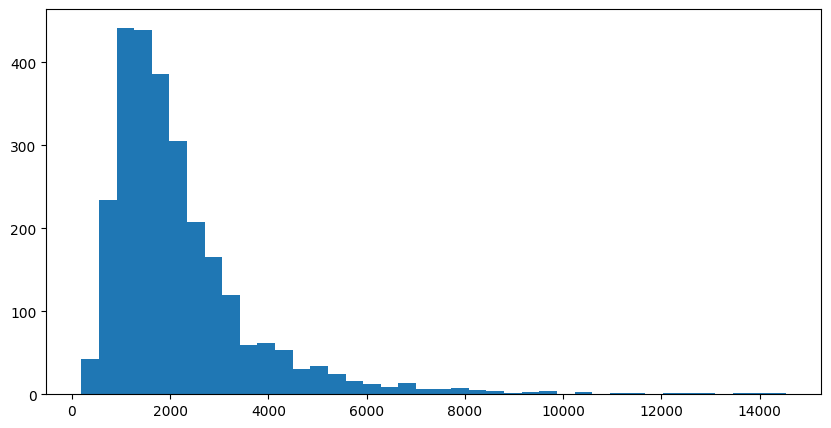

In [49]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= house_reduced['house_size'], bins=40)
plt.show()

<Axes: xlabel='house_size'>

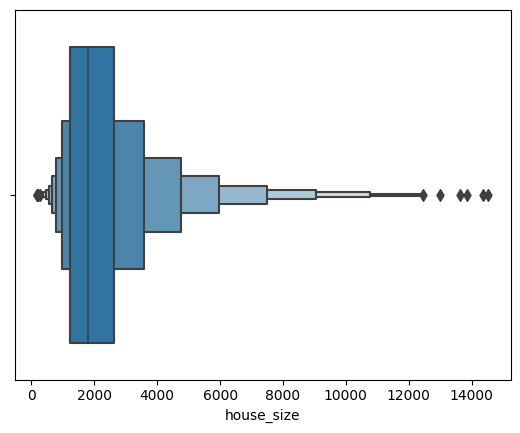

In [50]:
sns.boxenplot(data = house_reduced , x= 'house_size')

<Axes: xlabel='house_size'>

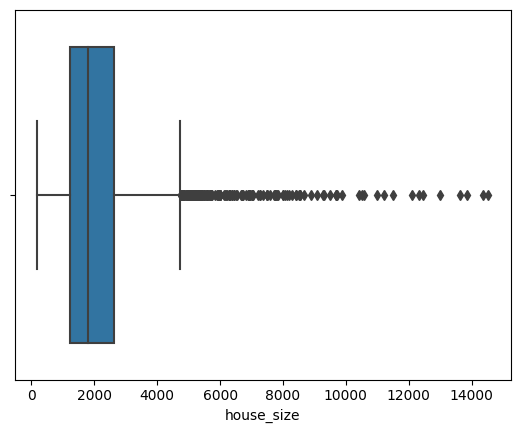

In [51]:
sns.boxplot(data = house_reduced , x= 'house_size')

In [52]:
house_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2708 entries, 0 to 985903
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bed         2708 non-null   float64
 1   bath        2663 non-null   float64
 2   city        2707 non-null   object 
 3   state       2708 non-null   object 
 4   house_size  2708 non-null   float64
 5   price       2708 non-null   float64
dtypes: float64(4), object(2)
memory usage: 148.1+ KB


In [53]:
house_reduced.isna().sum()

bed            0
bath          45
city           1
state          0
house_size     0
price          0
dtype: int64

<Axes: xlabel='bath'>

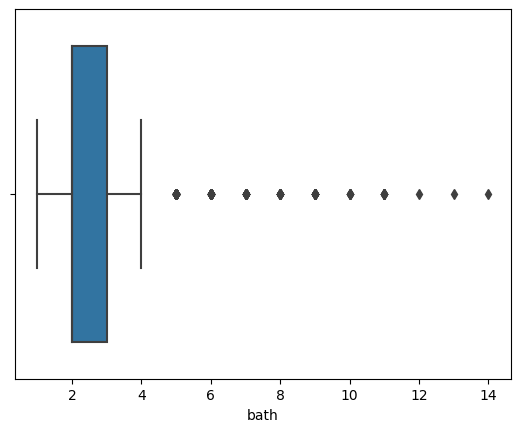

In [54]:
sns.boxplot(data = house_reduced , x= 'bath')

In [55]:
house_reduced.head()

,bed,bath,city,state,house_size,price
0,3.0,2.0,Adjuntas,Puerto Rico,920.0,105000.0
2,2.0,1.0,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,Ponce,Puerto Rico,1800.0,145000.0
5,4.0,3.0,San Sebastian,Puerto Rico,2520.0,179000.0
6,3.0,1.0,Ciales,Puerto Rico,2040.0,50000.0


In [56]:
house_reduced['bath'].mode()

0    2.0
Name: bath, dtype: float64

In [57]:
house_reduced['city'].mode()

0    Philadelphia
Name: city, dtype: object

In [58]:
house_reduced['bath'] = house_reduced['bath'].fillna(2)

<ipython-input-58-7b1e9bc74277>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_reduced['bath'] = house_reduced['bath'].fillna(2)


In [59]:
house_reduced['city'] = house_reduced['city'].fillna('Philadelphia')

<ipython-input-59-91fb615c647b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_reduced['city'] = house_reduced['city'].fillna('Philadelphia')


In [60]:
house_reduced.isna().sum()

bed           0
bath          0
city          0
state         0
house_size    0
price         0
dtype: int64

In [61]:
house_reduced.head()

,bed,bath,city,state,house_size,price
0,3.0,2.0,Adjuntas,Puerto Rico,920.0,105000.0
2,2.0,1.0,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,Ponce,Puerto Rico,1800.0,145000.0
5,4.0,3.0,San Sebastian,Puerto Rico,2520.0,179000.0
6,3.0,1.0,Ciales,Puerto Rico,2040.0,50000.0


In [62]:
dummy = pd.get_dummies(house_reduced['city'],drop_first=True)

In [63]:
dummy2 = pd.get_dummies(house_reduced['state'],drop_first=True)

In [64]:
df_df = house_reduced.drop(columns=['city','state'],axis=1)

In [65]:
final_df = pd.concat([df_df,dummy , dummy2],axis=1)

In [66]:
final_df.head()

,bed,bath,house_size,price,Absecon,Accord,Acton,Acushnet,Acworth,Adams,...,New Hampshire,New Jersey,New York,Pennsylvania,Puerto Rico,Rhode Island,Vermont,Virgin Islands,West Virginia,Wyoming
0,3.0,2.0,920.0,105000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1.0,748.0,67000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4.0,2.0,1800.0,145000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,4.0,3.0,2520.0,179000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,3.0,1.0,2040.0,50000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:
x = final_df.drop('price' , axis=1)
y = final_df.price

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scale = MinMaxScaler()
X = scale.fit(x)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

TypeError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(xtrain,ytrain)

In [ ]:
reg.score(xtest,ytest)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_